In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import pprint

from jupyterthemes import jtplot
jtplot.style('grade3')

all_data = pd.read_csv('../../../../dataset_group.csv', header=None)

unique_id = list(set(all_data[1]))
#print(len(unique_id)) #Выведем количество id

items = list(set(all_data[2]))
#print(len(items)) #Выведем количество товаров

dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]

In [144]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(df)

      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
5             True           True    True  False    True     True    False   
6             True          False   False   True   False    False    False   
7            False          False   False  False   False    False     True   
8            False          False   False  False   False    False    False   
9            False          False    True   True   False    False     True   
10           False          False    True  False   False    False     True   
11           False          False    True  False    True    Fals

In [4]:
from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

In [5]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [8]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (vegetables, aluminum foil)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (vegetables, laundry detergent)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Count of result itemstes

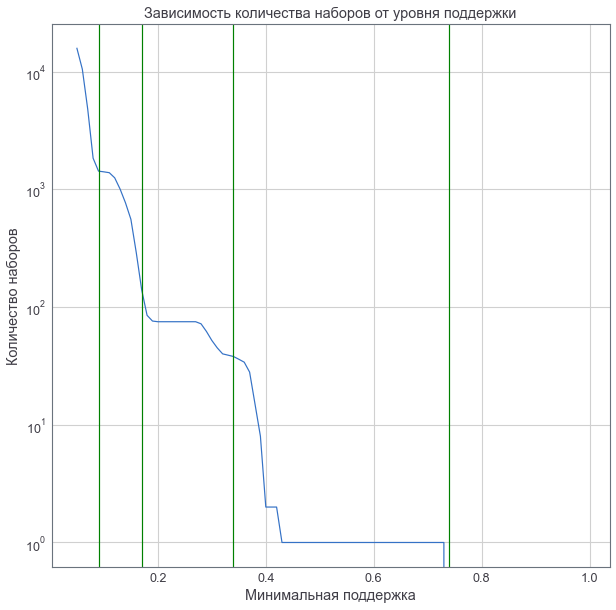

In [64]:
#4-5
supports = np.arange(0.05, 1, 0.01)
sups = []
counts = []

sets_lengths = []
cur_len = 10

for sup in supports:
    res = apriori(df, min_support=sup, use_colnames=True)
    res['length'] = res['itemsets'].apply(lambda x: len(x))
    sups.append(res)
    if res['length'].max() < cur_len:
        sets_lengths.append(sup)
        cur_len = res['length'].max()
    if res['length'].empty and cur_len > 0:
        sets_lengths.append(sup)
        cur_len = 0
    counts.append(sups[-1].shape[0])
counts = np.array(counts)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(supports, counts)
for i in range (1, len(sets_lengths)):
    plt.axvline(sets_lengths[i], color='green')
ax.set_yscale('log')
ax.set_xlabel('Минимальная поддержка') 
ax.set_ylabel('Количество наборов') 
ax.set_title('Зависимость количества наборов от уровня поддержки')
plt.show()

In [79]:
#6-8
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]

te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)

new_results = apriori(new_df, min_support=0.3, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x)) #добавление размера набора
print(new_results)

     support                                    itemsets  length
0   0.384548                             (aluminum foil)       1
1   0.385426                                    (bagels)       1
2   0.395961                                   (cereals)       1
3   0.390694                                   (cheeses)       1
4   0.388938                              (dinner rolls)       1
5   0.388060              (dishwashing liquid/detergent)       1
6   0.389816                                      (eggs)       1
7   0.398595                                 (ice cream)       1
8   0.395083                                (lunch meat)       1
9   0.380158                                      (milk)       1
10  0.421422                                   (poultry)       1
11  0.390694                                      (soda)       1
12  0.739245                                (vegetables)       1
13  0.394205                                   (waffles)       1
14  0.384548             

In [95]:
#9
new_results = apriori(new_df, min_support=0.15, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))
new_results = new_results[new_results['length'] > 1]
new_results = new_results[new_results.apply(lambda x: ('yogurt' in x['itemsets'] or 'waffles' in x['itemsets']), axis=1)]
print(new_results)

      support                                 itemsets  length
27   0.169447                 (waffles, aluminum foil)       2
28   0.177349                  (yogurt, aluminum foil)       2
40   0.159789                        (waffles, bagels)       2
41   0.162423                         (yogurt, bagels)       2
52   0.160667                       (waffles, cereals)       2
53   0.172081                        (yogurt, cereals)       2
63   0.172959                       (waffles, cheeses)       2
64   0.172081                        (yogurt, cheeses)       2
73   0.169447                  (waffles, dinner rolls)       2
74   0.166813                   (yogurt, dinner rolls)       2
82   0.175593  (waffles, dishwashing liquid/detergent)       2
83   0.158033   (yogurt, dishwashing liquid/detergent)       2
90   0.169447                          (waffles, eggs)       2
91   0.174715                           (yogurt, eggs)       2
97   0.172959                     (waffles, ice cream) 

In [99]:
#10
other = set(list(df)) - set(list(new_df))
other_items = [ list(elem)[0] for elem in results['itemsets']]
other_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem not in other_items] for id in unique_id]

te = TransactionEncoder()
te_ary = te.fit_transform(other_dataset)
other_df = pd.DataFrame(te_ary, columns=te.columns_)

other_results = apriori(other_df, min_support=0.3, use_colnames=True)
other_results['length'] = other_results['itemsets'].apply(lambda x: len(x))
print(other_results)

     support             itemsets  length
0   0.374890       (all- purpose)       1
1   0.374890               (beef)       1
2   0.367867             (butter)       1
3   0.379280         (coffee/tea)       1
4   0.352941              (flour)       1
5   0.370500             (fruits)       1
6   0.345917          (hand soap)       1
7   0.375768   (individual meals)       1
8   0.376646              (juice)       1
9   0.371378            (ketchup)       1
10  0.378402  (laundry detergent)       1
11  0.375768              (mixes)       1
12  0.362599       (paper towels)       1
13  0.371378              (pasta)       1
14  0.355575               (pork)       1
15  0.367867      (sandwich bags)       1
16  0.349429    (sandwich loaves)       1
17  0.368745            (shampoo)       1
18  0.379280               (soap)       1
19  0.373134    (spaghetti sauce)       1
20  0.360843              (sugar)       1
21  0.378402       (toilet paper)       1
22  0.369622          (tortillas) 

In [150]:
res2 = apriori(df, min_support=0.05, use_colnames=True)

#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

res2 = res2[res2['itemsets'].apply(lambda x: len([item for item in x if item.startswith('s')]) >=2 )]
print(res2)

        support                                           itemsets
675    0.137840                   (sandwich loaves, sandwich bags)
676    0.146620                           (shampoo, sandwich bags)
677    0.158911                              (soap, sandwich bags)
678    0.162423                              (soda, sandwich bags)
679    0.147498                   (spaghetti sauce, sandwich bags)
...         ...                                                ...
15722  0.064091                  (yogurt, soda, vegetables, sugar)
15729  0.058824  (spaghetti sauce, toilet paper, vegetables, su...
15730  0.050044    (spaghetti sauce, vegetables, tortillas, sugar)
15731  0.057946      (spaghetti sauce, waffles, vegetables, sugar)
15732  0.061457       (yogurt, spaghetti sauce, vegetables, sugar)

[1275 rows x 2 columns]


In [151]:
res3 = apriori(df, min_support=0.1, use_colnames=True)
res3['length'] = res3['itemsets'].apply(lambda x: len(x))

res3 = res3[(res3['support'] <= 0.25) & (res3['support'] >= 0.1)]
print(res3)

       support                             itemsets  length
38    0.157155        (aluminum foil, all- purpose)       2
39    0.150132               (bagels, all- purpose)       2
40    0.144864                 (beef, all- purpose)       2
41    0.147498               (all- purpose, butter)       2
42    0.151010              (cereals, all- purpose)       2
...        ...                                  ...     ...
1401  0.135206  (waffles, toilet paper, vegetables)       3
1402  0.130817   (yogurt, toilet paper, vegetables)       3
1403  0.121159     (waffles, vegetables, tortillas)       3
1404  0.130817      (yogurt, vegetables, tortillas)       3
1405  0.146620        (yogurt, waffles, vegetables)       3

[1331 rows x 3 columns]
